## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

## Get the data

In [2]:
df = pd.read_csv('../../../datasets/parte2/train.csv')

#### Columns

In [3]:
df.columns

Index(['Data', 'Hora', 'Normal (kWh)', 'Horário Económico (kWh)',
       'Autoconsumo (kWh)', 'Injeção na rede (kWh)', 'dt', 'dt_iso',
       'city_name', 'temp', 'feels_like', 'temp_min', 'temp_max', 'pressure',
       'sea_level', 'grnd_level', 'humidity', 'wind_speed', 'rain_1h',
       'clouds_all', 'weather_description', 'shortwave_radiation (W/m²)',
       'direct_radiation (W/m²)', 'diffuse_radiation (W/m²)',
       'direct_normal_irradiance (W/m²)', 'terrestrial_radiation (W/m²)',
       'direct_radiation_instant (W/m²)', 'diffuse_radiation_instant (W/m²)',
       'direct_normal_irradiance_instant (W/m²)',
       'terrestrial_radiation_instant (W/m²)'],
      dtype='object')

#### Shape

In [4]:
if 'Injeção na rede (kWh)' in df:
    df['Injeção na rede (kWh)'].value_counts()

In [5]:
df.shape

(11016, 30)

In [6]:
df.head()

,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh),dt,dt_iso,city_name,temp,...,weather_description,shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),terrestrial_radiation (W/m²),direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²)
0,2021-09-29,0,0.0,0.0,0.0,NaN,1632873600,2021-09-29 00:00:00+00:00,local,13.97,...,overcast clouds,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-09-29,1,0.0,0.0,0.0,NaN,1632877200,2021-09-29 01:00:00+00:00,local,13.48,...,overcast clouds,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-09-29,2,0.0,0.0,0.0,NaN,1632880800,2021-09-29 02:00:00+00:00,local,12.93,...,overcast clouds,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-09-29,3,0.0,0.0,0.0,NaN,1632884400,2021-09-29 03:00:00+00:00,local,12.61,...,overcast clouds,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-09-29,4,0.0,0.0,0.0,NaN,1632888000,2021-09-29 04:00:00+00:00,local,12.61,...,overcast clouds,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Dataset info

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Data                                     11016 non-null  object 
 1   Hora                                     11016 non-null  int64  
 2   Normal (kWh)                             11016 non-null  float64
 3   Horário Económico (kWh)                  11016 non-null  float64
 4   Autoconsumo (kWh)                        11016 non-null  float64
 5   Injeção na rede (kWh)                    3239 non-null   object 
 6   dt                                       11016 non-null  int64  
 7   dt_iso                                   11016 non-null  object 
 8   city_name                                11016 non-null  object 
 9   temp                                     11016 non-null  float64
 10  feels_like                               11016

#### Unique values

In [8]:
print(df["dt"].unique())
print(len(df["dt"].unique()))

print(df["city_name"].unique())
print(df["weather_description"].unique())

print(df["rain_1h"].unique())
print(len(df["rain_1h"].unique()))

[1632873600 1632877200 1632880800 ... 1672520400 1672524000 1672527600]
11016
['local']
['overcast clouds' 'broken clouds' 'few clouds' 'sky is clear'
 'scattered clouds' 'light rain' 'moderate rain' 'heavy intensity rain']
[ nan 1.   2.   3.   4.   7.   5.   0.13 0.42 0.35 0.58 0.31 0.97 1.75
 4.37 7.45 5.01 1.77 0.95 1.02 0.6  0.53 0.16 0.17 0.12 0.19 0.28 0.39
 0.89 1.16 1.32 2.16 6.15 6.89 5.93 3.51 2.12 0.54 0.15 0.14 0.59 0.93
 1.15 1.42 1.1  3.08 4.05 2.6  2.45 2.88 1.66 0.5  0.23 0.49 0.44 1.3
 3.19 2.78 1.84 0.74 0.24 0.25 0.48 0.64 0.46 0.85 0.73 1.51 1.01 1.98
 1.41 0.88 0.18 0.57 0.11 0.37 0.2  0.32 0.33 0.27 0.26 0.22 0.29 0.36
 0.68 3.15 1.6  0.47 0.34 0.69 0.78 0.92 1.19 1.48 0.86 0.38 0.82 1.07
 2.31 4.93 4.06 0.41 0.81 0.3  0.4  1.74 1.35 1.59 0.87 1.49 1.95 1.26
 1.89 1.7  2.48 2.38 0.7  0.21 0.56 1.36 1.47 0.72 1.13 1.38 1.22 0.45
 0.84 1.28 1.37 2.34 1.58 3.2  2.27 1.05 1.18 0.91 2.59 3.39 2.2  1.81
 1.52 1.23 0.65 0.63 0.52 1.94 3.84 2.09 0.51 0.55 0.1  2.64 3.33 2

#### Statistical dispersion

In [9]:
print(df.describe())


               Hora  Normal (kWh)  Horário Económico (kWh)  Autoconsumo (kWh)  \
count  11016.000000  11016.000000             11016.000000       11016.000000   
mean      11.500000      0.202278                 0.159714           0.117314   
std        6.922501      0.349478                 0.271792           0.176762   
min        0.000000      0.000000                 0.000000           0.000000   
25%        5.750000      0.000000                 0.000000           0.000000   
50%       11.500000      0.000000                 0.000000           0.000000   
75%       17.250000      0.314000                 0.288000           0.227000   
max       23.000000      3.251000                 6.978000           1.192000   

                 dt          temp    feels_like      temp_min      temp_max  \
count  1.101600e+04  11016.000000  11016.000000  11016.000000  11016.000000   
mean   1.652701e+09     16.182991     15.826868     14.195064     17.288098   
std    1.144868e+07      5.756972

#### Missing values

In [10]:
print(df.isna().sum())

Data                                           0
Hora                                           0
Normal (kWh)                                   0
Horário Económico (kWh)                        0
Autoconsumo (kWh)                              0
Injeção na rede (kWh)                       7777
dt                                             0
dt_iso                                         0
city_name                                      0
temp                                           0
feels_like                                     0
temp_min                                       0
temp_max                                       0
pressure                                       0
sea_level                                  11016
grnd_level                                 11016
humidity                                       0
wind_speed                                     0
rain_1h                                     8732
clouds_all                                     0
weather_description 

#### Filling missing value with 'None' in 'Injeção na rede (kWh)' column

In [11]:
df['Injeção na rede (kWh)'] = df['Injeção na rede (kWh)'].fillna("None")

In [12]:
print(df["Injeção na rede (kWh)"].unique())

['None' 'Low' 'Medium' 'High' 'Very High']


In [13]:
print(df.isna().sum())

Data                                           0
Hora                                           0
Normal (kWh)                                   0
Horário Económico (kWh)                        0
Autoconsumo (kWh)                              0
Injeção na rede (kWh)                          0
dt                                             0
dt_iso                                         0
city_name                                      0
temp                                           0
feels_like                                     0
temp_min                                       0
temp_max                                       0
pressure                                       0
sea_level                                  11016
grnd_level                                 11016
humidity                                       0
wind_speed                                     0
rain_1h                                     8732
clouds_all                                     0
weather_description 

## Univariate Analysis

#### dt variable

In [14]:
df['dt'].value_counts()

dt
1632873600    1
1659322800    1
1659294000    1
1659297600    1
1659301200    1
             ..
1646096400    1
1646100000    1
1646103600    1
1646107200    1
1672527600    1
Name: count, Length: 11016, dtype: int64

## Multivariate Analysis

#### Relation between all variables

In [15]:
#sns.pairplot(df, hue='injection ')

#### Features mean by class

In [16]:
#df.groupby(by=['Injeção na rede (kWh)']).mean(numeric_only=True)

#### Outliers

KeyError: 'hour'

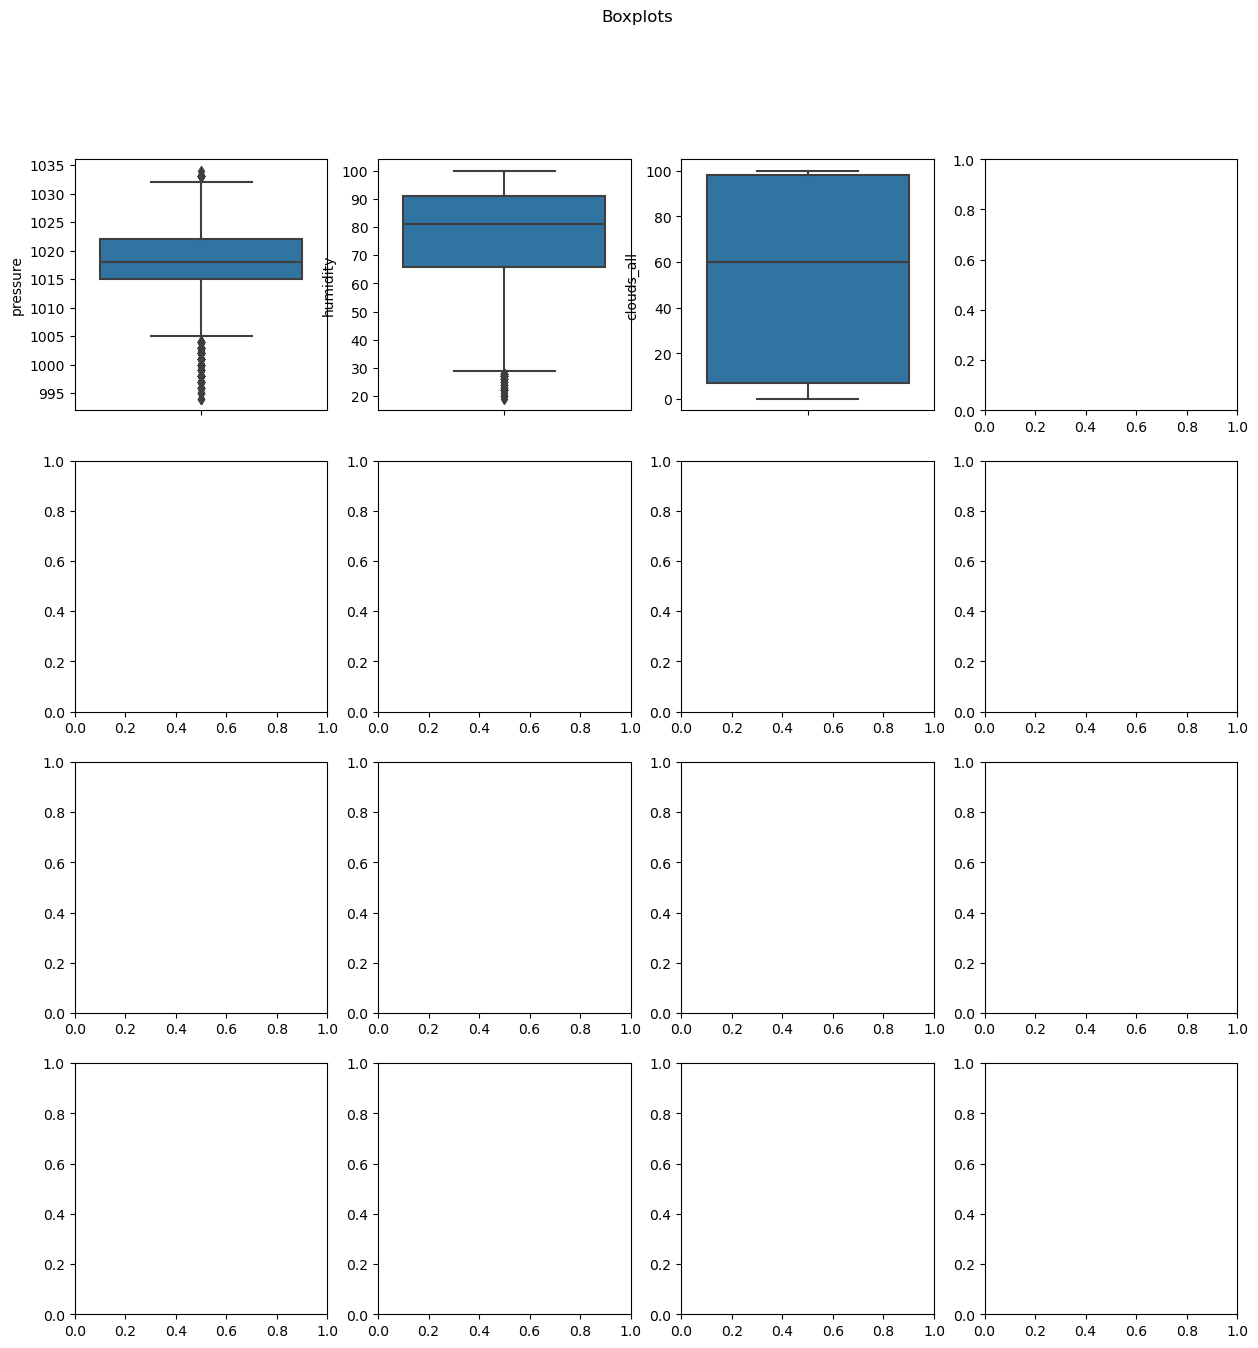

In [17]:
fig, axs = plt.subplots(4, 4, figsize=(15, 15))
fig.suptitle("Boxplots")

sns.boxplot(y=df["pressure"], ax=axs[0,0])
sns.boxplot(y=df["humidity"], ax=axs[0,1])
sns.boxplot(y=df["clouds_all"], ax=axs[0,2])
sns.boxplot(y=df["hour"], ax=axs[0,3])
sns.boxplot(y=df["temp"], ax=axs[1,0])
sns.boxplot(y=df["feels_like"], ax=axs[1,1])
sns.boxplot(y=df["temp_min"], ax=axs[1,2])
sns.boxplot(y=df["temp_max"], ax=axs[1,3])
sns.boxplot(y=df["wind_speed"], ax=axs[2,0])
sns.boxplot(y=df["rain_1h"], ax=axs[2,1])
sns.boxplot(y=df["normal"], ax=axs[2,2])
sns.boxplot(y=df["economic_schedule"], ax=axs[2,3])
sns.boxplot(y=df["self-consumption"], ax=axs[3,0])

#### Statistical dispersion

/Users/goncalobraga/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/goncalobraga/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/goncalobraga/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/goncalobraga/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na 

KeyError: 'hour'

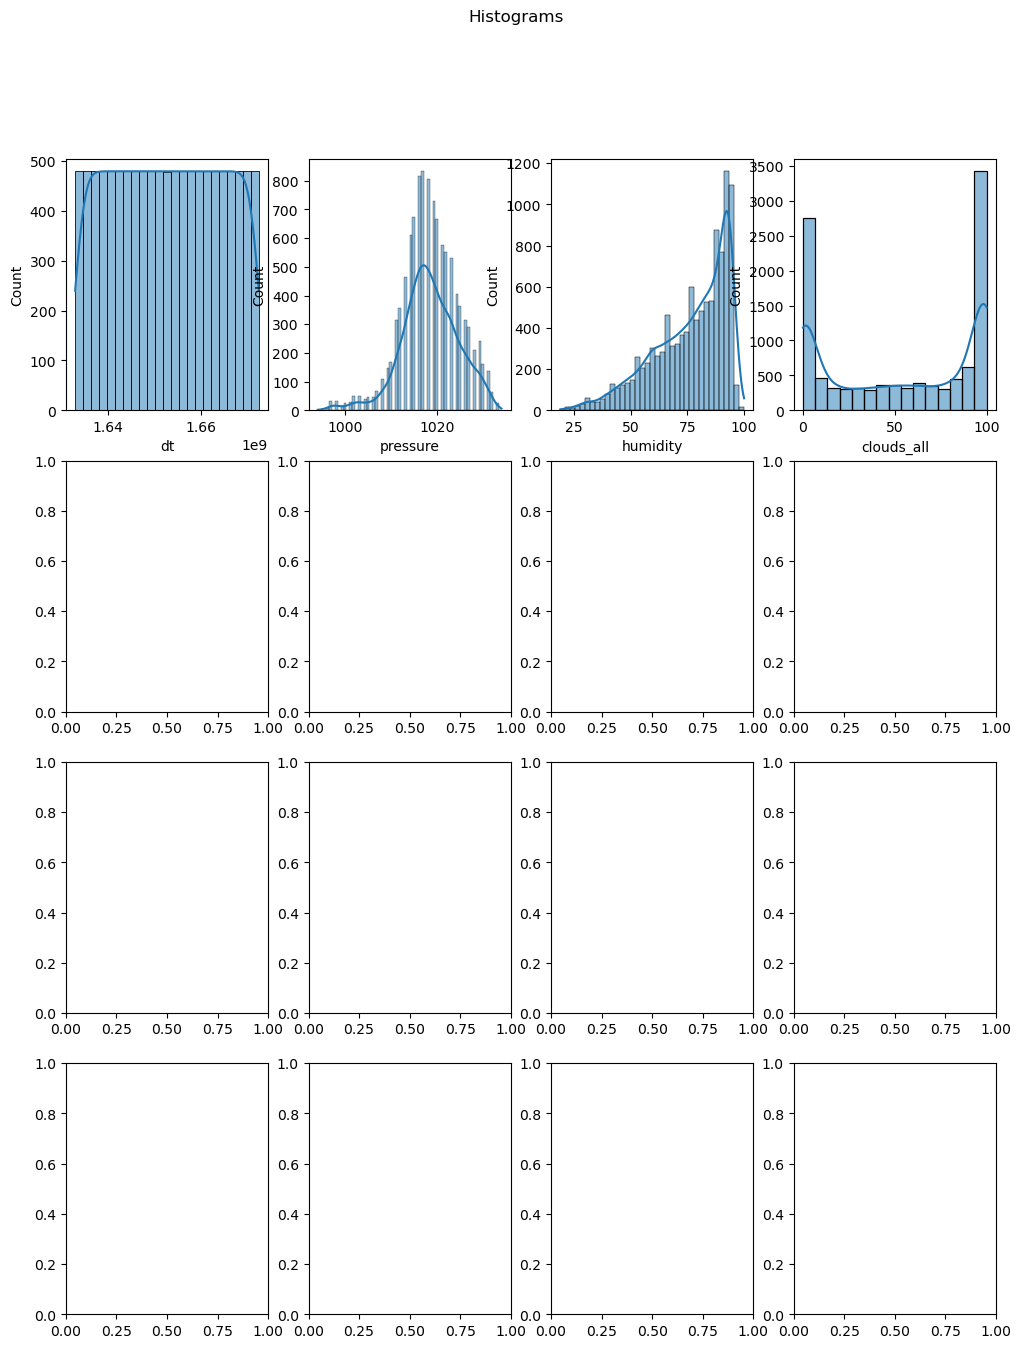

In [18]:
fig, axs = plt.subplots(4, 4, figsize=(12, 15))
fig.suptitle("Histograms")

sns.histplot(df["dt"], ax=axs[0,0], kde=True)
sns.histplot(df["pressure"], ax=axs[0,1], kde=True)
sns.histplot(df["humidity"], ax=axs[0,2], kde=True)
sns.histplot(df["clouds_all"], ax=axs[0,3], kde=True)
sns.histplot(df["hour"], ax=axs[1,0], kde=True)
sns.histplot(df["temp"], ax=axs[1,1], kde=True)
sns.histplot(df["feels_like"], ax=axs[1,2], kde=True)
sns.histplot(df["temp_min"], ax=axs[1,3], kde=True)
sns.histplot(df["temp_max"], ax=axs[2,0], kde=True)
sns.histplot(df["wind_speed"], ax=axs[2,1], kde=True)
sns.histplot(df["rain_1h"], ax=axs[2,2], kde=True)
sns.histplot(df["normal"], ax=axs[2,3], kde=True)
sns.histplot(df["economic_schedule"], ax=axs[3,0], kde=True)
sns.histplot(df["self-consumption"], ax=axs[3,1], kde=True)

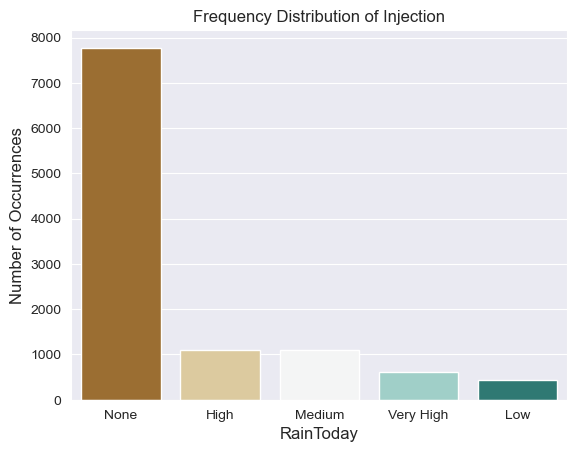

In [19]:
injection_count = df['Injeção na rede (kWh)'].value_counts()
sns.set_style('darkgrid')
sns.barplot(x=injection_count.index, y=injection_count.values, palette='BrBG')
plt.title('Frequency Distribution of Injection')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('RainToday', fontsize=12)
plt.show()

In [20]:
label_encoder = LabelEncoder()

df['Injeção na rede (kWh)'] = label_encoder.fit_transform(df['Injeção na rede (kWh)'])

df['Data'] = pd.to_datetime(df['Data'], format="%Y-%m-%d", utc=True)
df['year'] = df['Data'].dt.year
df['month'] = df['Data'].dt.month
df['day'] = df['Data'].dt.day
df.drop(['Data'], inplace=True, axis=1)

/Users/goncalobraga/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

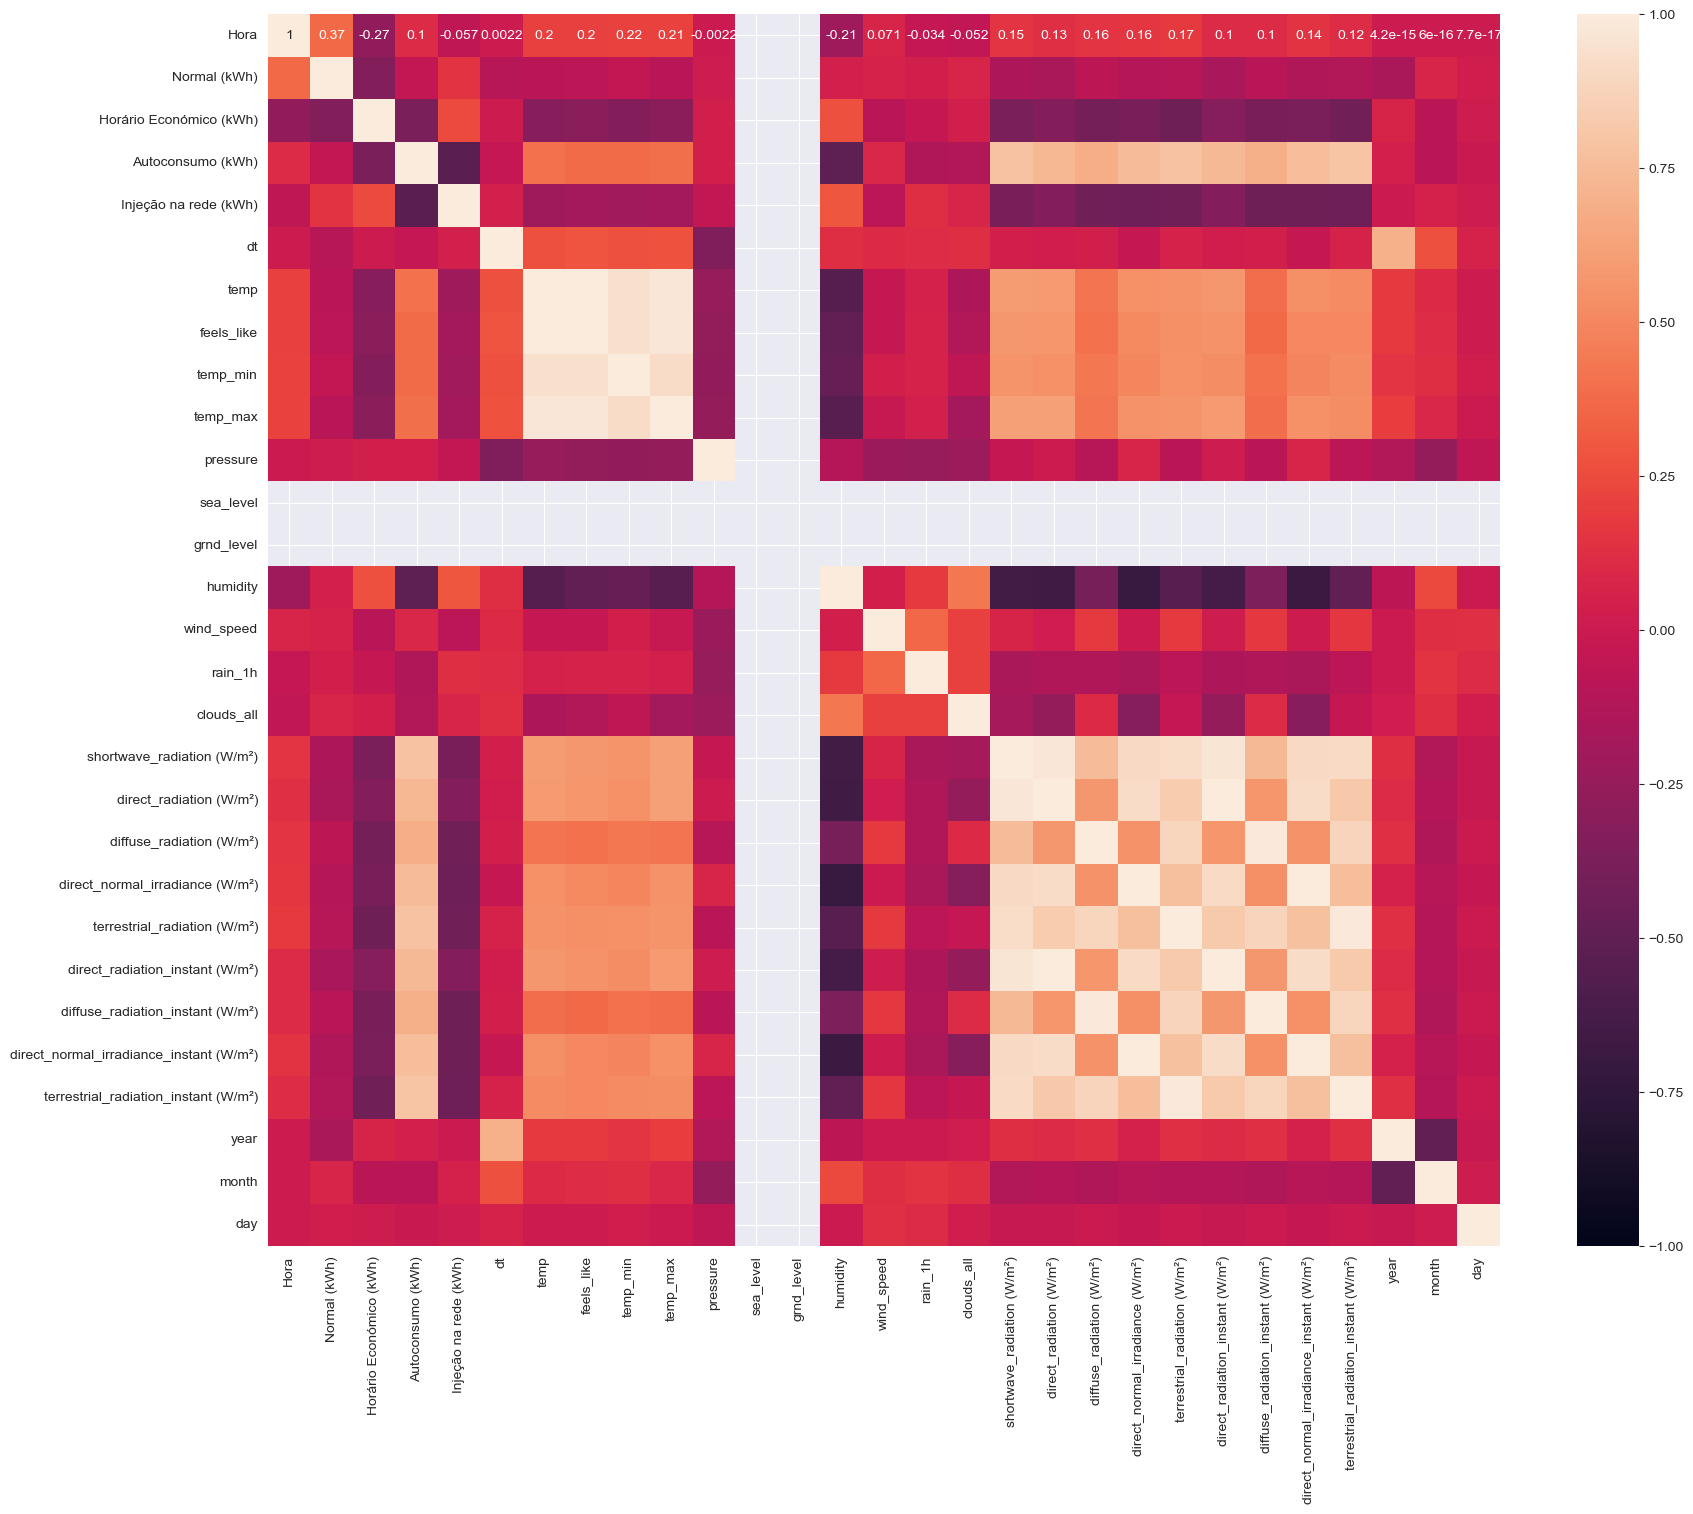

In [21]:
corr_matrix = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

In [22]:
print(corr_matrix["Injeção na rede (kWh)"])

Hora                                      -0.057440
Normal (kWh)                               0.147976
Horário Económico (kWh)                    0.242812
Autoconsumo (kWh)                         -0.527046
Injeção na rede (kWh)                      1.000000
dt                                         0.041863
temp                                      -0.209680
feels_like                                -0.195312
temp_min                                  -0.199771
temp_max                                  -0.193484
pressure                                  -0.040450
sea_level                                       NaN
grnd_level                                      NaN
humidity                                   0.292897
wind_speed                                -0.070369
rain_1h                                    0.124366
clouds_all                                 0.077215
shortwave_radiation (W/m²)                -0.389845
direct_radiation (W/m²)                   -0.330217
diffuse_radi